<h3> Multi-class Sentiment Analysis of Journal Entries </h3>
<font size="3">
Communication is an essential part of human life, enabling the building of relationship and understanding. However, many things such as emotions are often overlooked or difficult to express via speech, hence resulting in miscommunication or neglect. In the healthcare sector, communication allows for more comprehensive care to be administered as medical professionals are able to quickly pinpoint illness causes and after-effects of treatment so that more targeted care can be provided. However, there are many challenges that affects communication within the healthcare sector, especially with the shortages in medical professionals as well as the unpleasant state of patients. Medical Humanities is a field of medical studies that looks to integrate various forms of humanities such as art, writing and journaling as outlets for patients to express themselves. This can help to alleviate discomfort and pant up emotions of the patient while allowing medical professionals to learn more about their patient. By understanding their patients at a deeper layer, the focus of healthcare will shift from solely tackling the illness to providing a better overall experience of patients, both mentally and physically.

In this project, we aim to build a sentiment analysis model to detect various emotions within a journal entry that are important for the medical field, such as depression, sadness and anxiety. Through this project, we hope to provide medical professionals with a better understanding of their patients as well as a view on the progression of their patients' emotions throughout the duration of their treatment. 
</font>
<hr></hr>

<strong>Libraries</strong>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

<strong> Import Dataset </strong>

In [37]:
df = pd.read_csv('data.csv')
df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


As this dataset has both a sentiment analysis component as well as a topic modelling component, labels for the topics are not needed hence should be removed to better facilitate EDA

In [38]:
# Removal of unnecessary columns
df = df[df.columns.drop(list(df.filter(regex='Answer.t1.')))]
df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,Answer.f1.excited.raw,Answer.f1.frustrated.raw,Answer.f1.happy.raw,Answer.f1.jealous.raw,Answer.f1.nostalgic.raw,Answer.f1.proud.raw,Answer.f1.sad.raw,Answer.f1.satisfied.raw,Answer.f1.surprised.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


<strong> EDA </strong>

Questions in mind
- How many rows and columns in this dataset
- Are there any rows with missing values
- What are the various emotion labels
- What is the distribution of emotions within the dataset
- Are there observations with more than 1 emotion label
- What are the most common words used in each emotion

In [39]:
# Dimensionality of Dataset
rows, cols = df.shape
print(f'Rows: {rows} Cols: {cols}')

Rows: 1473 Cols: 19


In [40]:
# Emotion Labels
label_headers = [label.split(".")[2] for label in list(df.filter(regex='Answer.f1.'))]
print(label_headers)
print(f"Total Labels: {len(label_headers)}")

# Rename Columns
label_headers.insert(0, 'Entry')
df.columns = label_headers
df.head()

['afraid', 'angry', 'anxious', 'ashamed', 'awkward', 'bored', 'calm', 'confused', 'disgusted', 'excited', 'frustrated', 'happy', 'jealous', 'nostalgic', 'proud', 'sad', 'satisfied', 'surprised']
Total Labels: 18


,Entry,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,excited,frustrated,happy,jealous,nostalgic,proud,sad,satisfied,surprised
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [41]:
# No empty values
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Entry       1473 non-null   object
 1   afraid      1473 non-null   bool  
 2   angry       1473 non-null   bool  
 3   anxious     1473 non-null   bool  
 4   ashamed     1473 non-null   bool  
 5   awkward     1473 non-null   bool  
 6   bored       1473 non-null   bool  
 7   calm        1473 non-null   bool  
 8   confused    1473 non-null   bool  
 9   disgusted   1473 non-null   bool  
 10  excited     1473 non-null   bool  
 11  frustrated  1473 non-null   bool  
 12  happy       1473 non-null   bool  
 13  jealous     1473 non-null   bool  
 14  nostalgic   1473 non-null   bool  
 15  proud       1473 non-null   bool  
 16  sad         1473 non-null   bool  
 17  satisfied   1473 non-null   bool  
 18  surprised   1473 non-null   bool  
dtypes: bool(18), object(1)
memory usage: 37.5+ KB


Entry         0
afraid        0
angry         0
anxious       0
ashamed       0
awkward       0
bored         0
calm          0
confused      0
disgusted     0
excited       0
frustrated    0
happy         0
jealous       0
nostalgic     0
proud         0
sad           0
satisfied     0
surprised     0
dtype: int64

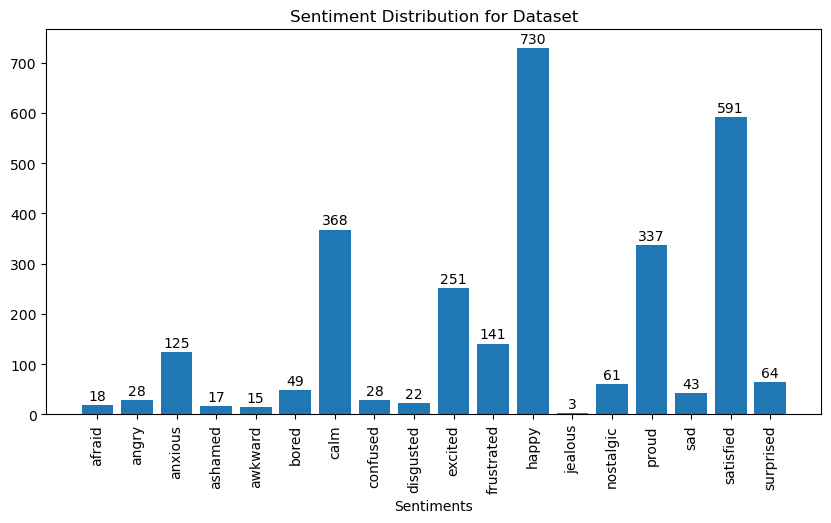

In [42]:
# Distribution of emotions
sentiments_count = df.sum(axis=0)
sentiments_count.drop('Entry', inplace=True)

# Visualizing distribution
sentiments = sentiments_count.index
plt.figure(figsize=(10,5))

plt.bar(x=sentiments, height=sentiments_count)
plt.xticks(rotation=90)

plt.xlabel("Sentiments")
plt.title("Sentiment Distribution for Dataset")

for i in range(len(sentiments)):
    plt.text(i, sentiments_count[i] + 10, sentiments_count[i], ha='center')

plt.show()

<font size='3'>
As seen from the bar graph for the sentiment labels within the dataset, some of the sentiments such as jealous, awkward, ashamed and afraid have very little occurrence(<20) while sentiments such as calm, happy and satisfied have high occurrence

This could pose an issue for model training as there will be insufficient data for models to be trained to identify sentiments with very little occurrence. Oversampling can be done to balance the number of labels.
</font>

In [43]:
# Multi-sentiment observations
df_copy = df

df_copy['emotions'] = df_copy[sentiments].apply(lambda x: [sentiments[idx] for idx, col in enumerate(x) if col], axis=1)
df_copy.head()

,Entry,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,excited,frustrated,happy,jealous,nostalgic,proud,sad,satisfied,surprised,emotions
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,"[anxious, happy, proud]"
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,[calm]
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,"[calm, happy, satisfied]"
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,"[calm, happy]"
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,[happy]


Unique Sentiment Combinations: 196


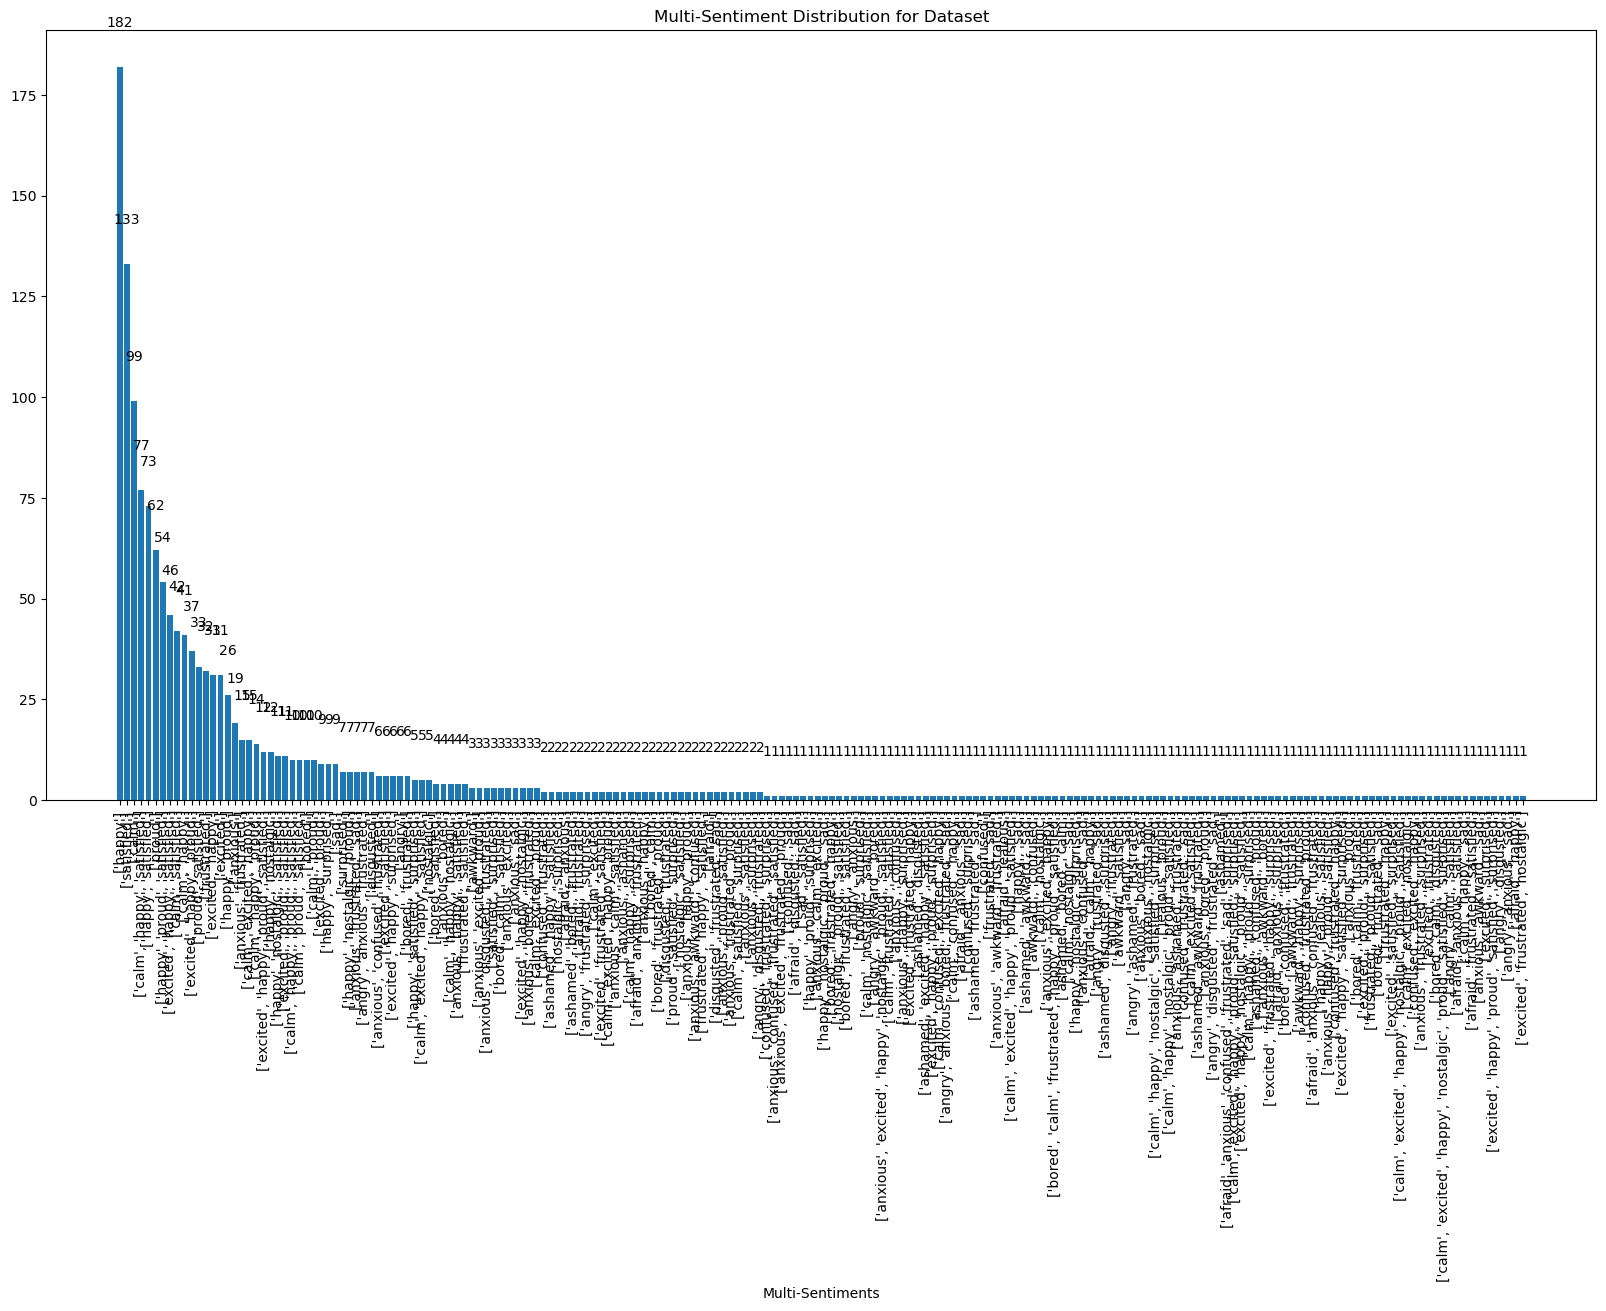

In [44]:
# Distribution of multi-sentiment observations
multi_sentiments = df_copy['emotions']
multi_sentiments_count = multi_sentiments.value_counts()

# Visualizing distribution
multi_sentiments = multi_sentiments_count.index
multi_sentiments = [str(sentiment_list) for sentiment_list in multi_sentiments]
print(f'Unique Sentiment Combinations: {len(multi_sentiments)}')

plt.figure(figsize=(20,10))

plt.bar(x=multi_sentiments, height=multi_sentiments_count)
plt.xticks(rotation=90)

plt.xlabel("Multi-Sentiments")
plt.title("Multi-Sentiment Distribution for Dataset")

for i in range(len(multi_sentiments)):
    plt.text(i, multi_sentiments_count[i] + 10, multi_sentiments_count[i], ha='center')

<font size='3'>
As seen from the bar graph for the multi-sentiment labels within the dataset, there are a total of 196 unique combinations of sentiments within the dataset, with some combinations appearing only once. The sentiment combinations that appears the most are "happy only", "satisfied only" and "calm, happy and satisfied".

Due to observations having multi-label, this data set is suitable for multi-label classification methods. Methods would include multi-label classification, hierarchical classification, aspect-based sentiment analysis and squential models. Multi-class sentiment analysis with sentiments per document is more complex than traditional single-label sentiment analysis. Due to time constraints of this project, this could be explored at a later stage and single-label sentiment analysis can be tackled first.
</font>

<strong>EDA depression dataset from hugging face</strong>

In [45]:
depression_df = pd.read_csv('depression_dataset_reddit_twitter.csv')
depression_df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [46]:
row, col = depression_df.shape
print(f'Row: {row}, Col: {col}')

Row: 7731, Col: 2


In [47]:
depression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


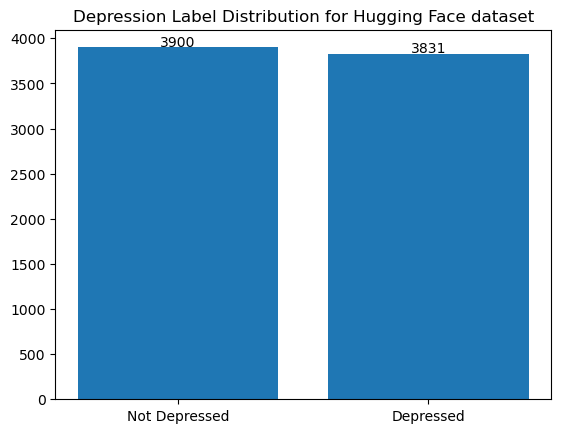

In [48]:
label_distribution = depression_df['is_depression'].value_counts()
labels = ['Not Depressed', 'Depressed']

plt.bar(labels, label_distribution)
plt.title('Depression Label Distribution for Hugging Face dataset')

for i in range(len(labels)):
    plt.text(i, label_distribution[i] + 10, label_distribution[i], ha='center')

plt.show()


<strong>EDA Emotions dataset from hugging face</strong>

<font size='3'>
This dataset is extracted from hugging face (https://huggingface.co/datasets/dair-ai/emotion)

The dataset contains 6 emotions
- 0 (saddness)
- 1 (joy)
- 2 (love)
- 3 (anger)
- 4 (fear)
- 5 (surprise)
</font>

In [49]:
emotions_df = pd.read_csv('emotions_dataset.csv')
emotions_df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [50]:
row, col = emotions_df.shape
print(f'Row: {row} Column: {col}')

Row: 416809 Column: 2


In [51]:
emotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [52]:
emotions_count = emotions_df['label'].value_counts()
emotions_count.sort_index(inplace=True)
emotions_count

0    121187
1    141067
2     34554
3     57317
4     47712
5     14972
Name: label, dtype: int64

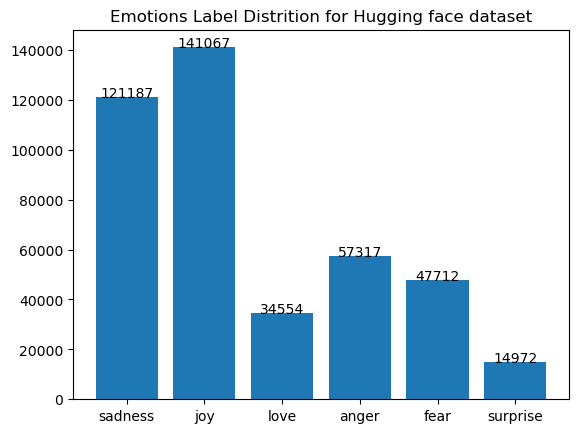

In [53]:
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

plt.bar(emotion_labels, emotions_count)
plt.title('Emotions Label Distrition for Hugging face dataset')

for i in range(len(emotion_labels)):
    plt.text(i, emotions_count[i] + 10, emotions_count[i], ha='center')

plt.show()

<strong>Combining Dataset</strong>

In [54]:
depression_only_df = depression_df[depression_df['is_depression'] == 1].copy()
depression_only_df.reset_index()
depression_only_df.shape

(3831, 2)

In [55]:
depression_only_df.rename({'clean_text': 'text', 'is_depression': 'label'}, axis=1, inplace=True)
depression_only_df.loc[:, 'label'] = 6
depression_only_df

,text,label
0,we understand that most people who reply immed...,6
1,welcome to r depression s check in post a plac...,6
2,anyone else instead of sleeping more when depr...,6
3,i ve kind of stuffed around a lot in my life d...,6
4,sleep is my greatest and most comforting escap...,6
...,...,...
3826,thlolo march eh it s because i don t want stre...,6
3827,i hate it when i m having depression day and t...,6
3828,educational depression,6
3829,dmt powder helping with depression amp anxiety...,6


In [56]:
new_emotions_df = pd.concat([emotions_df, depression_only_df])
new_emotions_df.reset_index(inplace=True)
new_emotions_df.drop('index', axis=1, inplace=True)
new_emotions_df

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
420635,thlolo march eh it s because i don t want stre...,6
420636,i hate it when i m having depression day and t...,6
420637,educational depression,6
420638,dmt powder helping with depression amp anxiety...,6


In [57]:
new_emotions_count = new_emotions_df['label'].value_counts()
new_emotions_count.sort_index(inplace=True)
new_emotions_count

0    121187
1    141067
2     34554
3     57317
4     47712
5     14972
6      3831
Name: label, dtype: int64

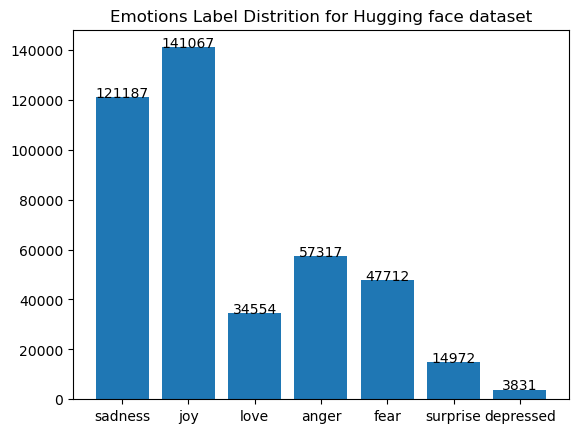

In [58]:
new_emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'depressed']

plt.bar(new_emotion_labels, new_emotions_count)
plt.title('Emotions Label Distrition for Hugging face dataset')

for i in range(len(new_emotion_labels)):
    plt.text(i, new_emotions_count[i] + 10, new_emotions_count[i], ha='center')

plt.show()

In [59]:
new_emotions_df.to_csv('new_emotions.csv',index=False)

<h3>EDA of Dataset</h3>

In [5]:
df = pd.read_csv('new_emotions.csv')
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [6]:
row, col = df.shape
print(f'Row: {row} Col: {col}')

df.info()

Row: 420640 Col: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420640 entries, 0 to 420639
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    420640 non-null  object
 1   label   420640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


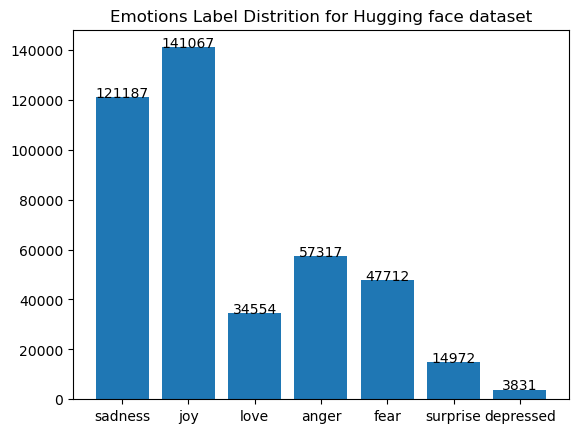

In [7]:
sentiment_count = df['label'].value_counts()
sentiment_count.sort_index(inplace=True)


sentiment_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'depressed']

plt.bar(sentiment_labels, sentiment_count)
plt.title('Emotions Label Distrition for Hugging face dataset')

plt.xticks()

for i in range(len(sentiment_labels)):
    plt.text(i, sentiment_count[i] + 10, sentiment_count[i], ha='center')

plt.show()

<h3>Pre Processing</h3>

<font size='3'>Transforming all words to lower case<font>

In [8]:
df['text'] = df['text'].apply(lambda x: x.lower())

<font size='3'>Expanding Contractions<font>

In [9]:
def expand_contraptions(text):

    contractions_dict = {
        "ain't": "am not",
        "aint": "am not",
        "aren't": "are not",
        "arent": "are not",
        "can't": "cannot",
        "cant": "cannot",
        "couldn't": "could not",
        "couldnt": "could not",
        "didn't": "did not",
        "didnt": "did not",
        "doesn't": "does not",
        "doesnt": "does not",
        "don't": "do not",
        "dont": "do not",
        "hadn't": "had not",
        "hadnt": "had not",
        "hasn't": "has not",
        "hasnt": "has not",
        "haven't": "have not",
        "havent": "have not",
        "he'd": "he had",
        "he'll": "he will",
        "he's": "he is",
        "hes": "he is",
        "i'd": "i had",
        "i'll": "i will",
        "i'm": "i am",
        "im": "i am",
        "i've": "i have",
        "ive": "i have",
        "isn't": "is not",
        "isnt": "is not",
        "it's": "it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would / she had",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is / that has",
        "there's": "there is / there has",
        "they'd": "they would / they had",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would / we had",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is / what has",
        "what've": "what have",
        "where's": "where is / where has",
        "who'd": "who would / who had",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is / who has",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would / you had",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }

    word_list = text.split()

    for i in range(len(word_list)):
        if word_list[i] in contractions_dict:
            word_list[i] = contractions_dict[word_list[i]]

    return " ".join(word_list)

df['text'] = df['text'].apply(lambda x: expand_contraptions(x))

<font size='3'>Removal of punctuations, numbers and special characters<font>

In [10]:
# Remove all special symbols and numbers
df['text'] = df['text'].str.replace('[^ a-zA-Z]', ' ', regex=True)

<font size='3'>Tokenization<font>

In [11]:
df['text_tokenized'] = df['text'].apply(lambda x: x.split())
df['text_tokenized']

0         [i, feel, awful, about, it, too, because, it, ...
1                            [i, am, alone, i, feel, awful]
2         [i, have, probably, mentioned, this, before, b...
3         [i, was, feeling, a, little, low, few, days, b...
4         [i, beleive, that, i, am, much, more, sensitiv...
                                ...                        
420635    [thlolo, march, eh, it, s, because, i, don, t,...
420636    [i, hate, it, when, i, m, having, depression, ...
420637                            [educational, depression]
420638    [dmt, powder, helping, with, depression, amp, ...
420639    [the, great, depression, money, armageddon, ep...
Name: text_tokenized, Length: 420640, dtype: object

<font size='3'>Removal of stopwords<font>

In [12]:
stop_words = stopwords.words('english')

df['text_tokenized'] = df['text_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df['text_tokenized']

0         [feel, awful, job, get, position, succeed, hap...
1                                      [alone, feel, awful]
2         [probably, mentioned, really, feel, proud, act...
3                        [feeling, little, low, days, back]
4         [beleive, much, sensitive, peoples, feelings, ...
                                ...                        
420635    [thlolo, march, eh, want, stress, mjolo, uyi, ...
420636    [hate, depression, day, something, wrote, get,...
420637                            [educational, depression]
420638    [dmt, powder, helping, depression, amp, anxiet...
420639    [great, depression, money, armageddon, ep, htt...
Name: text_tokenized, Length: 420640, dtype: object

<font size='3'>Lemmatization<font>

In [13]:
lemmatizer = WordNetLemmatizer()

df['text_lemma'] = df['text_tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['text_lemma']

0         [feel, awful, job, get, position, succeed, hap...
1                                      [alone, feel, awful]
2         [probably, mentioned, really, feel, proud, act...
3                         [feeling, little, low, day, back]
4         [beleive, much, sensitive, people, feeling, te...
                                ...                        
420635    [thlolo, march, eh, want, stress, mjolo, uyi, ...
420636    [hate, depression, day, something, wrote, get,...
420637                            [educational, depression]
420638    [dmt, powder, helping, depression, amp, anxiet...
420639    [great, depression, money, armageddon, ep, htt...
Name: text_lemma, Length: 420640, dtype: object

<font size='3'>Stemming<font>

In [14]:
stemmer = PorterStemmer()

df['text_stem'] = df['text_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df['text_stem']

0              [feel, aw, job, get, posit, succeed, happen]
1                                          [alon, feel, aw]
2         [probabl, mention, realli, feel, proud, actual...
3                             [feel, littl, low, day, back]
4         [beleiv, much, sensit, peopl, feel, tend, comp...
                                ...                        
420635    [thlolo, march, eh, want, stress, mjolo, uyi, ...
420636    [hate, depress, day, someth, wrote, get, publi...
420637                                      [educ, depress]
420638    [dmt, powder, help, depress, amp, anxieti, dmt...
420639    [great, depress, money, armageddon, ep, http, ...
Name: text_stem, Length: 420640, dtype: object

<h3>Understanding Most Common Words</h3>

In [15]:
df['text_lemma_join'] = df['text_lemma'].apply(lambda x: " ".join(x))
df['text_lemma_join'] 

df['text_stem_join'] = df['text_stem'].apply(lambda x: " ".join(x))
df['text_stem_join'] 

0                      feel aw job get posit succeed happen
1                                              alon feel aw
2         probabl mention realli feel proud actual keep ...
3                                   feel littl low day back
4             beleiv much sensit peopl feel tend compassion
                                ...                        
420635        thlolo march eh want stress mjolo uyi depress
420636    hate depress day someth wrote get publish like...
420637                                         educ depress
420638    dmt powder help depress amp anxieti dmt psyche...
420639    great depress money armageddon ep http co b lr...
Name: text_stem_join, Length: 420640, dtype: object

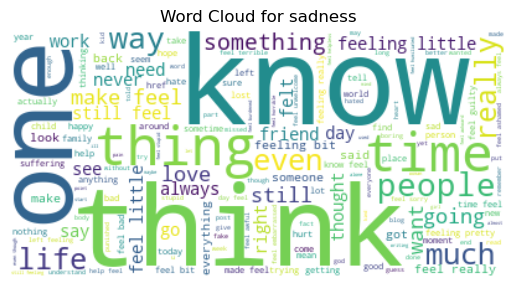

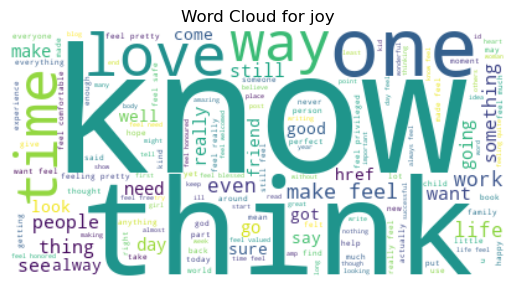

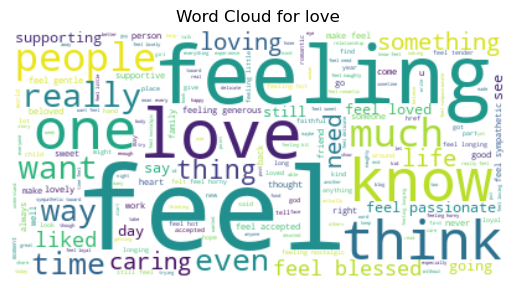

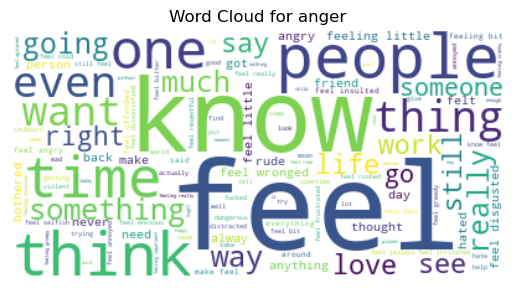

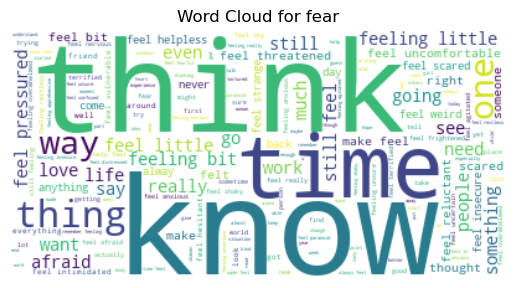

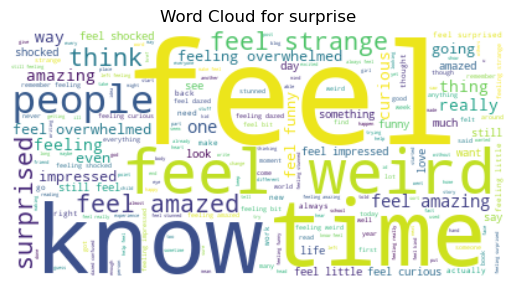

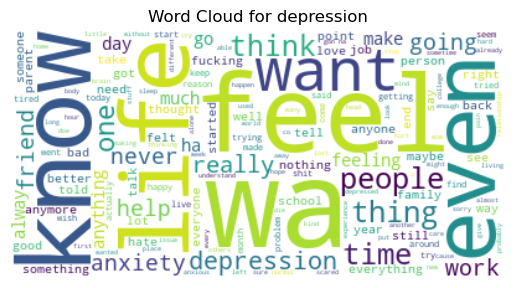

In [16]:
sentiment_map = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise",
    6: "depression"
}

for i in range(7):
    

    corpus = " ".join(df[df['label'] == i]['text_lemma_join'].to_list())

    wordcloud = WordCloud(background_color="white").generate(corpus)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment_map[i]}")
    plt.axis("off")
    plt.show()



In [17]:
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(df['text_lemma_join'], df['label'], test_size=0.25, random_state=4)
X_stem_train, X_stem_test, y_stem_train, y_stem_test = train_test_split(df['text_stem_join'], df['label'], test_size=0.25, random_state=4)

print("Train: ",X_lemma_train.shape, y_lemma_train.shape,"Test: ",(X_lemma_test.shape,y_lemma_test.shape))
print("Train: ",X_stem_train.shape, y_stem_train.shape,"Test: ",(X_stem_test.shape,y_stem_test.shape))

Train:  (315480,) (315480,) Test:  ((105160,), (105160,))
Train:  (315480,) (315480,) Test:  ((105160,), (105160,))


<h3>Feature Engineering</h3>

In [18]:
lemma_vectorizer= TfidfVectorizer()
tf_x_lemma_train = lemma_vectorizer.fit_transform(X_lemma_train)
tf_x_lemma_test = lemma_vectorizer.transform(X_lemma_test)

In [19]:
stem_vectorizer= TfidfVectorizer()
tf_x_stem_train = stem_vectorizer.fit_transform(X_stem_train)
tf_x_stem_test = stem_vectorizer.transform(X_stem_test)

### Model Building

In [20]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [21]:
lr_lemma = LogisticRegression(solver='liblinear')
lr_lemma.fit(tf_x_lemma_train, y_lemma_train)

y_lemma_pred = lr_lemma.predict(tf_x_lemma_test)

In [22]:
lr_stem = LogisticRegression(solver='liblinear')
lr_stem.fit(tf_x_stem_train, y_stem_train)

y_stem_pred = lr_stem.predict(tf_x_stem_test)

In [23]:
print(f'Accuracy Lemma: {accuracy_score(y_lemma_test, y_lemma_pred)}')
print(f'F1 Score Lemma: {f1_score(y_lemma_test, y_lemma_pred, average="weighted")}')

print(f'Accuracy Stem: {accuracy_score(y_stem_test, y_stem_pred)}')
print(f'F1 Score Stem: {f1_score(y_stem_test, y_stem_pred, average="weighted")}')

Accuracy Lemma: 0.8958919741346519
F1 Score Lemma: 0.895088218597287
Accuracy Stem: 0.8730315709395208
F1 Score Stem: 0.8715535706293215


### Exporting Models

In [1]:
import joblib

# Save models to disk
joblib.dump(lemma_vectorizer, 'tfidf_vectorizer.pkl', compress=True)
joblib.dump(lr_lemma, 'logreg_model.pkl')

NameError: name 'lemma_vectorizer' is not defined

In [7]:
'''
1) Lower Paragraph
2) Expand Contractions
3) Remove Punctuations and Special Characters
4) Paragraph to Sentence
5) Tokenize Sentence  
6) Remove Stop Words
7) Lemmatize Words with WordNetLemmatizer
8) Join Words
9) Parse the Sentences into the TfidfVectorizer
10) Parse the Feature into LogisticRegression Model
11) Update the emotion dictionary based on predicted count
12) Return emotion dictionary
'''

from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import stopwords
import re

def expand_contraptions(text):

    contractions_dict = {
        "ain't": "am not",
        "aint": "am not",
        "aren't": "are not",
        "arent": "are not",
        "can't": "cannot",
        "cant": "cannot",
        "couldn't": "could not",
        "couldnt": "could not",
        "didn't": "did not",
        "didnt": "did not",
        "doesn't": "does not",
        "doesnt": "does not",
        "don't": "do not",
        "dont": "do not",
        "hadn't": "had not",
        "hadnt": "had not",
        "hasn't": "has not",
        "hasnt": "has not",
        "haven't": "have not",
        "havent": "have not",
        "he'd": "he had",
        "he'll": "he will",
        "he's": "he is",
        "hes": "he is",
        "i'd": "i had",
        "i'll": "i will",
        "i'm": "i am",
        "im": "i am",
        "i've": "i have",
        "ive": "i have",
        "isn't": "is not",
        "isnt": "is not",
        "it's": "it is",
        "let's": "let us",
        "mightn't": "might not",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would / she had",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is / that has",
        "there's": "there is / there has",
        "they'd": "they would / they had",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would / we had",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is / what has",
        "what've": "what have",
        "where's": "where is / where has",
        "who'd": "who would / who had",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is / who has",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would / you had",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }

    word_list = text.split()

    for i in range(len(word_list)):
        if word_list[i] in contractions_dict:
            word_list[i] = contractions_dict[word_list[i]]

    return " ".join(word_list)



def analyse_text(para):

    stop_words = stopwords.words('english')
    tfidfvectorizer = joblib.load('tfidf_vectorizer.pkl')
    logreg = joblib.load('logreg_model.pkl')

    para = para.lower()
    para = expand_contraptions(para)
    sentence_list = [sentence.strip() for sentence in para.split(".") if sentence != ""]
    print(sentence_list)

    emotions_results = defaultdict(int)
    sentiment_map = {
        0: "sadness",
        1: "joy",
        2: "love",
        3: "anger",
        4: "fear",
        5: "surprise",
        6: "depression"
    }

    for sentence in sentence_list:
        print(f'Sentence: {sentence}')
        para = re.sub(r"[^a-zA-Z]", "", para)
        wordlist = sentence.split()
        wordlist = [word for word in wordlist if word not in stop_words]

        lemmatizer = WordNetLemmatizer()
        wordlist = [lemmatizer.lemmatize(word) for word in wordlist]

        processed_sentence = " ".join(wordlist)
        print(f'Processed Sentence: {processed_sentence}')
        word_embedding = tfidfvectorizer.transform([processed_sentence])
        pred_emotion = logreg.predict(word_embedding)
        print(f'Sentiment Probability: {logreg.predict_proba(word_embedding)}')
        sentiment = sentiment_map[pred_emotion[0]]
        print(f'Predicted Sentiment: {sentiment}')
        emotions_results[sentiment] += 1

    return emotions_results

In [9]:
paragraph = "Today, my friend visited me and surprised me with my favorite coffee. I want to kill myself. My pet just died. It had been with me for my entire childhood. I miss it a lot. I want to die. The driver who ran over it should die."

print(analyse_text(paragraph))

['today, my friend visited me and surprised me with my favorite coffee', 'i want to kill myself', 'my pet just died', 'it had been with me for my entire childhood', 'i miss it a lot', 'i want to die', 'the driver who ran over it should die']
Sentence: today, my friend visited me and surprised me with my favorite coffee
Processed Sentence: today, friend visited surprised favorite coffee
Sentiment Probability: [[0.03601494 0.03214363 0.02178455 0.04322783 0.01212053 0.84574511
  0.00896342]]
Predicted Sentiment: surprise
Sentence: i want to kill myself
Processed Sentence: want kill
Sentiment Probability: [[0.05438118 0.15328292 0.05991643 0.10147306 0.05693525 0.01529834
  0.55871282]]
Predicted Sentiment: depression
Sentence: my pet just died
Processed Sentence: pet died
Sentiment Probability: [[0.701178   0.13730754 0.05367999 0.04591437 0.03801155 0.01431349
  0.00959506]]
Predicted Sentiment: sadness
Sentence: it had been with me for my entire childhood
Processed Sentence: entire chi

In [1]:
# Use a pipeline as a high-level helper
from textblob import TextBlob
import contractions
from transformers import pipeline

pipe = pipeline("text-classification", model="esuriddick/distilbert-base-uncased-finetuned-emotion")

In [13]:
import re
from collections import defaultdict

paragraph = "Today, my friend visited me and surprised me with my favorite coffee. I want to kill myself. My pet just died. It had been with me for my entire childhood. I miss it a lot. I want to die. The driver who ran over it should die."

para = contractions.fix(paragraph)
para = re.sub(r"[^ a-zA-Z\.,']+", "", para)


para = TextBlob(para)
para = para.correct()
para = para.lower()

sentence_list = para.sentences

emotion_results = defaultdict(int)

for sentence in sentence_list:
    processed_sentence = " ".join(sentence.words)
    result = pipe(processed_sentence)
    print(result)

    emotion_results[result[0]['label']] += 1

print(emotion_results)



[{'label': 'surprise', 'score': 0.9555087089538574}]
[{'label': 'anger', 'score': 0.6626195907592773}]
[{'label': 'sadness', 'score': 0.3841078281402588}]
[{'label': 'sadness', 'score': 0.6477630734443665}]
[{'label': 'sadness', 'score': 0.9897067546844482}]
[{'label': 'sadness', 'score': 0.7140382528305054}]
[{'label': 'anger', 'score': 0.46391579508781433}]
defaultdict(<class 'int'>, {'surprise': 1, 'anger': 2, 'sadness': 4})
